<a href="https://colab.research.google.com/github/rizki-putra-saimona-armen/XGBoost_Classifier_Heart_Attack_Prediction_Indonesia/blob/main/XGBoost_Classifier_Heart_Attack_Prediction_Indonesia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, balanced_accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from skopt.space import Real, Integer
from skopt import BayesSearchCV
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_attack_prediction_indonesia.csv")
df.head()


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


# data  Understingding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

# clening data

In [ ]:
df.isna().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [ ]:
df.drop(columns="alcohol_consumption",inplace=True)
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [ ]:
df.heart_attack.value_counts()

,count
heart_attack,
0,94854
1,63501


# Dataset Spliitng

In [ ]:
X = df.drop(columns="heart_attack")
y = df['heart_attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((126684, 26), (31671, 26), (126684,), (31671,))

# Preprocesing

In [ ]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [ ]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'physical_activity', 'dietary_habits',
       'air_pollution_exposure', 'stress_level', 'sleep_hours',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [ ]:
numeric_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("yeojohnson", PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("TargetEncoder",TargetEncoder(smoothing=1.0))
])

preprocesor = ColumnTransformer([
    ("numeric", numeric_pipeline, [
        "age", "cholesterol_level", "waist_circumference", "sleep_hours",
        "blood_pressure_systolic", "blood_pressure_diastolic",
        "fasting_blood_sugar", "cholesterol_hdl", "cholesterol_ldl", "triglycerides"
    ]),
    ("categoric", categoric_pipeline, [
        "gender", "region", "income_level", "hypertension", "diabetes",
        "obesity", "family_history", "smoking_status", "physical_activity",
        "dietary_habits", "air_pollution_exposure", "stress_level",
        "EKG_results", "previous_heart_disease", "medication_usage", "participated_in_free_screening"
    ])
])


# Training

In [ ]:
pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo",  XGBClassifier( n_jobs=-1,
        random_state=42,
        eval_metric='logloss',
        verbosity=0))
])
parameter = {
    'algo__max_depth': Integer(3, 8),
    'algo__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'algo__n_estimators': Integer(100, 500),
    'algo__subsample': Real(0.6, 0.9, prior='uniform'),
    'algo__colsample_bytree': Real(0.6, 1.0, prior='uniform'),
    'algo__gamma': Real(0, 5, prior='uniform'),
    'algo__reg_alpha': Real(0, 10, prior='uniform'),
    'algo__reg_lambda': Real(1, 10, prior='uniform'),
    'algo__min_child_weight': Integer(1, 10),
    'algo__scale_pos_weight': Real(0.5, 2.0, prior='uniform')
}

model = BayesSearchCV(pipeline, parameter,  cv=5, n_iter=100,   n_jobs=-1,  verbose=2, scoring='roc_auc',  random_state=42)
model.fit(X_train,y_train)

print(model.best_params_)
print(print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# confution matric

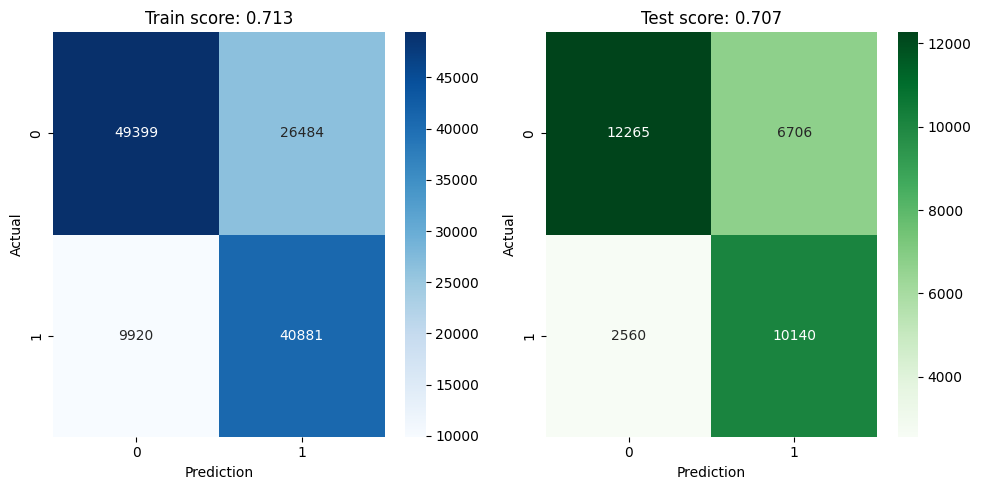

In [ ]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f"Train score: {acc_train:.3f}")
axes[0].set_xlabel("Prediction")
axes[0].set_ylabel("Actual")


sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f"Test score: {acc_test:.3f}")
axes[1].set_xlabel("Prediction")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
from jcopml.feature_importance import mean_score_decrease

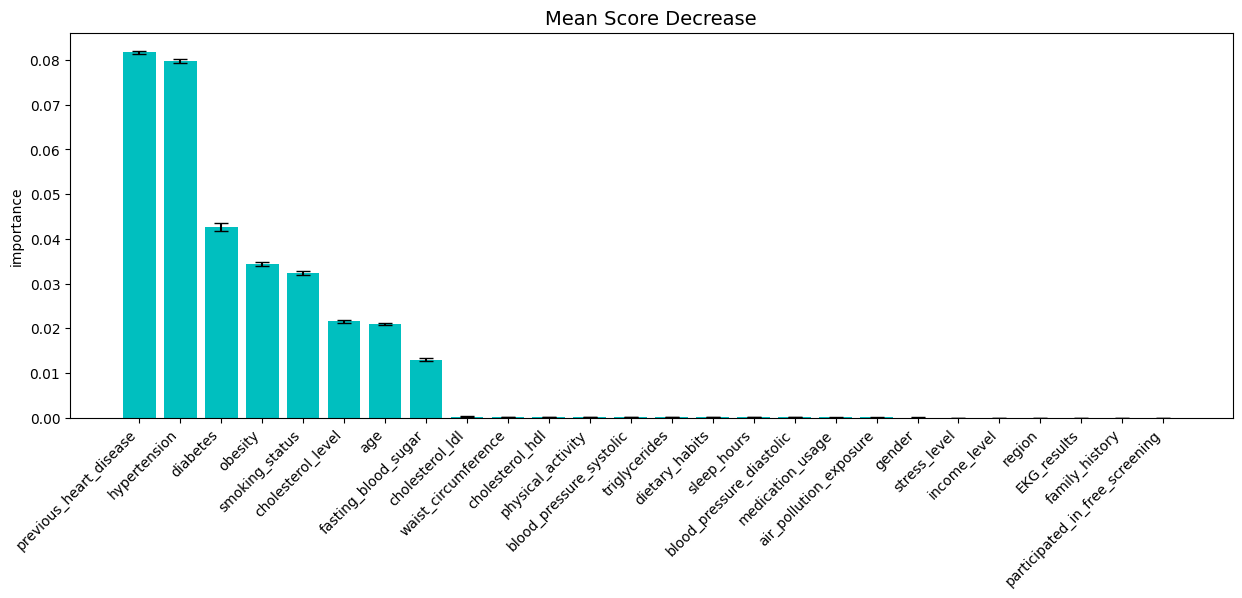

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)
